## Task 17 - Practical Task 2 - Diabetes Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

*Read **diabetes_updated.csv** into your Jupyter Notebook.*

Load the dataset. Visual inpection shows that missing data has been entered into the dataset as zeros for Glucose, BloodPressure, SkinThickness, Insulin, & BMI.

Here we will be using linear regression on multiple features to predict a person’s progression towards diabetes with respect to various attributes about them. Therefore, 'DiabetesPedigreeFunction' will be the target (dependent variable) (note that this is continous and so suitable for prediction with a regression model) and the other variables minus the outcome will be the features (independent variable). 

In [2]:
df = pd.read_csv('diabetes_updated.csv')
df.head()

# look for missing values, the results of .info() shows that we don't have any for this dataset but visual inspection shows that
# mssing data has been entered into the dataset as zeros
# diabetes_df.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Pre-processing

A visual inspection and looking at the distribution of the varibles in the dataset we can see that some of the missing data has been entered into the dataset as zeros for the following variables: Glucose, BloodPressure, SkinThickness, Insulin & BMI 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


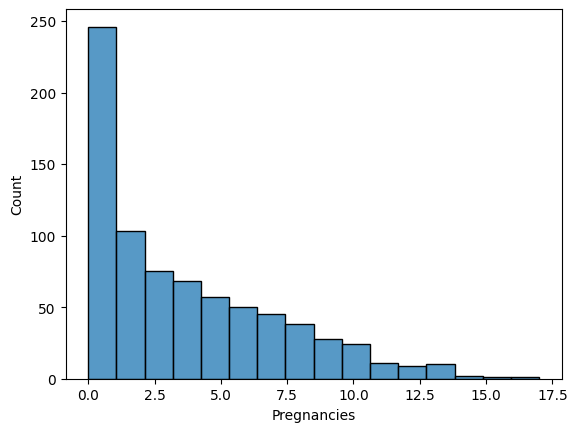

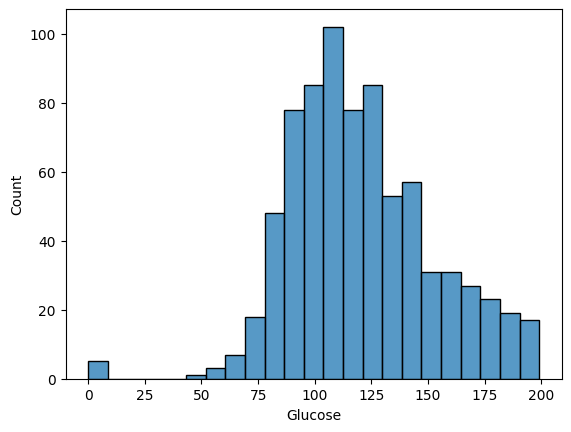

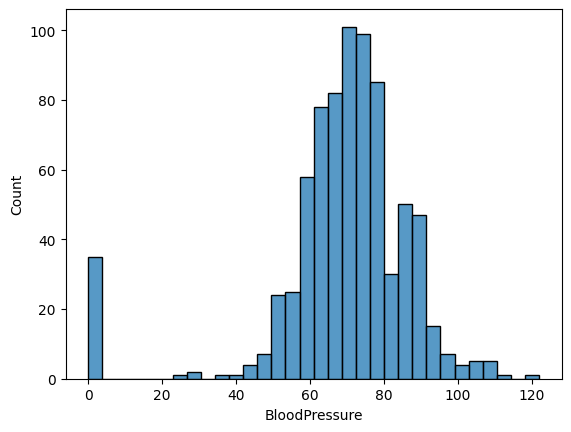

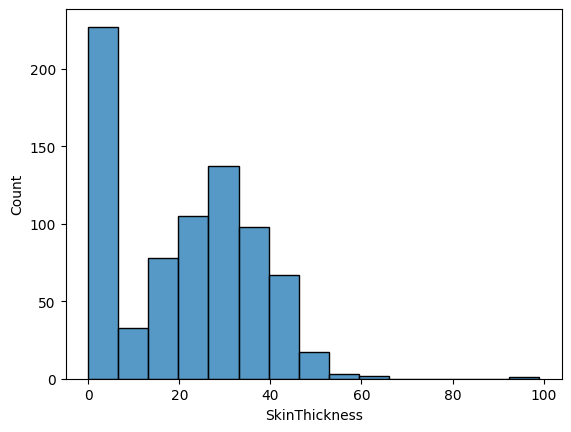

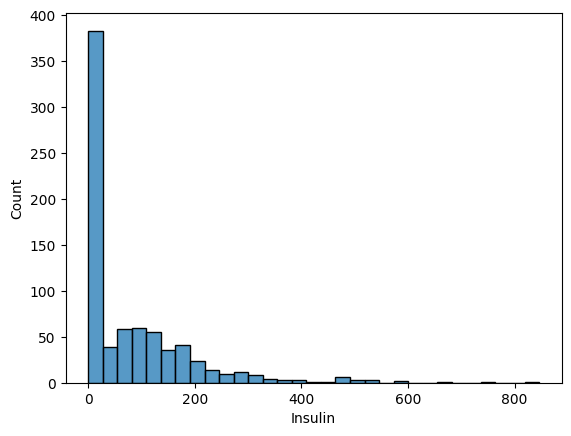

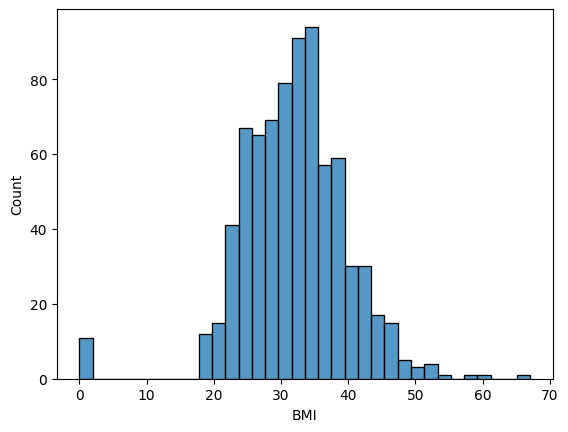

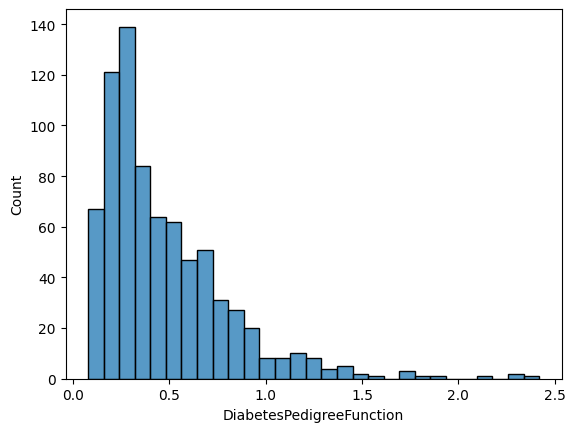

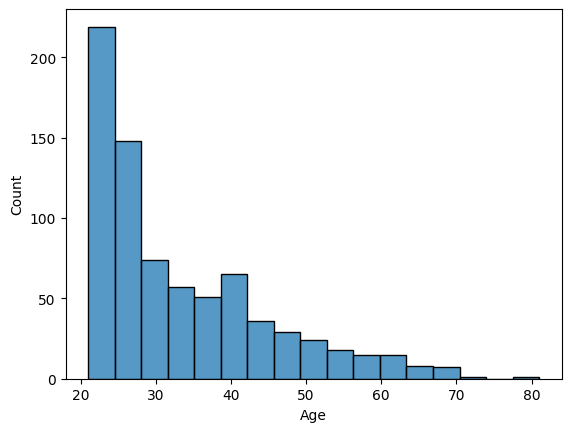

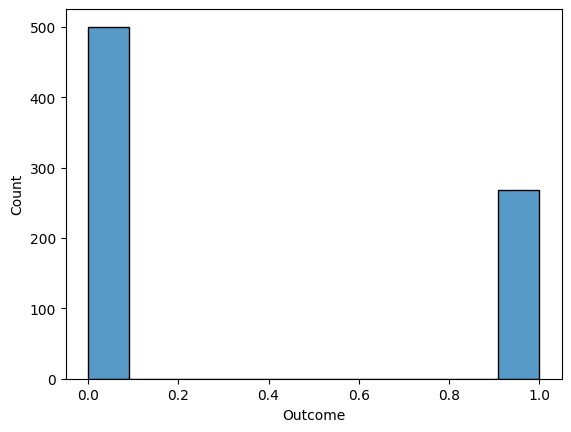

In [3]:
print (df.columns)

#Take a look at the distribution of the variables in the dataset
for col in df.columns:
    sns.histplot(data = df, x = col)
    plt.show()

# plt.scatter(df['BMI'],df['DiabetesPedigreeFunction'],color = 'b')

Remove the zeros from Glucose, BloodPressure, SkinThickness, Insulin & BMI and impute them with the median values for the skewed variables and mean values for the normal variables

In [4]:
# Replacing zero values with NaN
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

# Count of NaN
# print(df.isnull().sum())

# Replacing NaN with median values (could also have chosen to replace by mean which is suitable for normally distributed variables)
df["Glucose"] = df["Glucose"].replace(np.NaN, df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].replace(np.NaN, df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(np.NaN, df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(np.NaN, df["Insulin"].median())
df["BMI"] = df["BMI"].replace(np.NaN, df["BMI"].mean())

# df.head()

# df.describe().T

*Differentiate between the independent variables and the dependent variable, and assign them to variables X and Y.*

In [5]:
#df = df.drop("Outcome", axis =1) # drop the outcome as not suitable to use this as a predictor
X = df.drop("Outcome", axis =1) # input matrix
y = df["Outcome"] # target vector

*Generate training and test sets comprising 80% and 20% of the data,
respectively.*

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=42)

### Feature scaling

*Carefully analyse the types of features in this data set. Identify which
features require us to use StandardScaler from sklearn.preprocessing. Use
StandardScaler on the appropriate features of the train set and test sets.*

The below plots show that BloodPressure, SkinThickness, and BMI are normally distributed, and so are suitable to be scaled with standard scalar There is some skew for Glucose, Insulin and the other variables and I would like to preserve this.

In [7]:
# Uncomment one or both of the below plotting features to have a look at the distributions of the independent varibles  

# sns.pairplot(data=X_train)

# for col in X_train.columns:
#     sns.histplot(data = X_train, x = col)
#     plt.show()

In [8]:
# scratch test pad

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=42)

# normal_vars = ["BloodPressure", "SkinThickness", "BMI"]

# X_train_normal_vars = X_train[normal_vars]

In [9]:
# Fit the scalers on training data
sc_mm =  MinMaxScaler()
sc_mm.fit(X_train)

sc_ss = StandardScaler()
sc_ss.fit(X_train)

# Apply the MinMax scalar on train and test data
X_train_mm = sc_mm.transform(X_train)
X_test_mm = sc_mm.transform(X_test)

# Apply the Standard scalar on train and test data
X_train_ss = sc_ss.transform(X_train)
X_test_ss = sc_ss.transform(X_test)

# Make the default scaling MinMax
X_train_scaled=X_train_mm.copy()
X_test_scaled=X_test_mm.copy()

# Choose the variables to use StandardScalar on
# Pregnancies - 0, Glucose - 1, BloodPressure - 2, SkinThickness - 3, Insulin - 4, BMI - 5, 6- DiabetesPedigreeFunction Age - 7
normal_vars=[2,3,5]

# apply StandardScaling to the normally distributed variables
for i in normal_vars:
      X_train_scaled[:,i] = X_train_ss[:,i]
      X_test_scaled[:,i] = X_test_ss[:,i]

*Generate a multiple linear regression model using the training set. Use all
of the independent variables.*

*Print out the intercept and coefficients of the trained model.*

Here we fit a linear regression model to the training set and print out the model intercept and coefficients

In [10]:
# create an empty model
diabetes_model = LinearRegression()

# fit the model
diabetes_model.fit(X_train_scaled,y_train)

# Extract the model parameters
print('Intercept:', diabetes_model.intercept_)
print('Coefficients:', diabetes_model.coef_)

# Pregnancies - 0, Glucose - 1, BloodPressure - 2, SkinThickness - 3, Insulin - 4, BMI - 5, 6- DiabetesPedigreeFunction Age - 7

Intercept: -0.2671500610706726
Coefficients: [ 0.18956143  0.99098772 -0.02198847  0.00693055 -0.19345156  0.10767658
  0.21030454  0.34840753]


*Generate predictions for the test set. Compare the values used to make
these predictions to the ones in the original diabetes data set. What needs
to be done to make the interpretation of our predictions more meaningful?*

The model is fitted to scaled non-dimensionalised data. To make the interpretation of our predictions more meaningful we would need to reverse transform our independent variables so that they had the same units as the measured values.

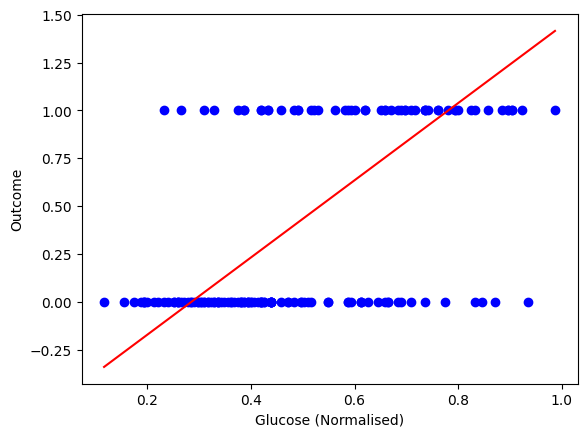

In [11]:
# Plot the data and model
y_pred = diabetes_model.predict(X_test_scaled)

# Create line coordinates
X_line = np.empty(X_test_scaled.shape)
for i in range(X_test_scaled.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test_scaled[:,i]), np.max(X_test_scaled[:,i]), num=X_test_scaled.shape[0])
y_line = diabetes_model.predict(X_line)

plt.scatter(X_test_scaled[:,1],y_test,color = 'b')
plt.plot(X_line[:,1],y_line,color = 'r')
plt.xlabel('Glucose (Normalised)')
plt.ylabel('Outcome')
plt.show()

*Compute R-squared for your model on the **test set**.*

The R2 score represents the proportion of variance in the target variable that can be explained by the model. An R-squared value close to 1 shows a better fit with the data. The R-squared of 0.2825 is low and I think that regression on the 'Outcome' value will be more suited to logistic regression. 

In [12]:
# R squared score
r2= r2_score(y_test,y_pred)
print(f"R-squared: {round(r2,4)}")

R-squared: 0.2825


Note: I have looked at the next task - Task 18 and it looks quite similar, I will move onto logistic regression and wait for feedback on this task in case I have missed something important.